In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
Yogurt = pd.read_csv("./.kaggle_data/Rdatasets/Yogurt.csv")
Yogurt.shape

(2412, 11)

In [16]:
Yogurt.head()

,Unnamed: 0,id,feat.yoplait,feat.dannon,feat.hiland,feat.weight,price.yoplait,price.dannon,price.hiland,price.weight,choice
0,1,1,0,0,0,0,10.8,8.1,6.1,7.9,weight
1,2,1,0,0,0,0,10.8,9.8,6.4,7.5,dannon
2,3,1,0,0,0,0,10.8,9.8,6.1,8.6,dannon
3,4,1,0,0,0,0,10.8,9.8,6.1,8.6,dannon
4,5,1,0,0,0,0,12.5,9.8,4.9,7.9,dannon


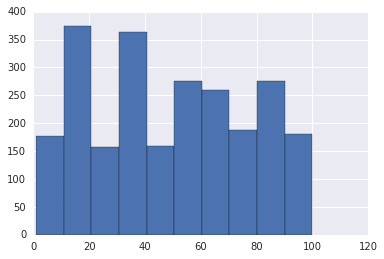

In [15]:
plt.hist(Yogurt["id"])
plt.show()